# **Flake8** analysis **before** issues fixing

Command launched

```flake8 --format=json-pretty --output-file=reports/linters/3.0.0-report-flake8-before.json --config=.flake8 src```

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 18, 8
import random
import json
import os

my_red_palette = ['#9d0208', '#ff1100', '#e85d04', '#faa307', '#ffcd34', '#fff3b0']
my_pastel_palette = ['#b9fbc0', '#98f5e1', '#8eecf5', '#90dbf4', '#a3c4f3', '#cfbaf0', '#f1c0e8', '#ffcfd2', '#fde4cf', '#fbf8cc']
before_report = '../reports/linters/3.0.0-report-flake8-before.json'
before_report_parse = '../reports/linters/3.0.1-report-flake8-before.json'
after_report = '../reports/linters/3.1.0-report-flake8-after.json'
after_report_parse = '../reports/linters/3.1.1-report-flake8-after.json'

In [2]:
try:
    with open(before_report, 'r', encoding='utf-8') as f:
        data = json.load(f)
    data_p = []
    for _, value in data.items():
        data_p += value
    json_string = json.dumps(data_p)
    with open(before_report_parse, 'w', encoding='utf-8') as f:
        f.write(json_string)
except OSError as e:
    print(e)

In [3]:
df1 = pd.read_json(before_report_parse)
df1.sample(5, random_state=3)

,code,filename,line_number,column_number,text,physical_line
16,E242,src/config.py,29,32,tab after ':',\t'PROCESSED_TESTING_DATA_PATH':\t\t'data/proc...
64,E226,src/data/make_dataset.py,73,41,missing whitespace around arithmetic operator,\t\t\t\timg = cv2.imread(TESTING_SOURCE_PATH+T...
136,E126,src/models/predict_model.py,121,8,continuation line over-indented for hanging in...,"\t\t\t\t\t\t\tpixelAccuracy(v, testMasks[i]) f..."
70,E226,src/data/make_dataset.py,78,39,missing whitespace around arithmetic operator,\t\t\t\tcv2.imwrite(TESTING_DATA_DEST_PATH+nam...
211,E226,src/models/train_model.py,154,57,missing whitespace around arithmetic operator,\tpth = str(int(NUM_EPOCHS))+'_'+str(int(BATCH...


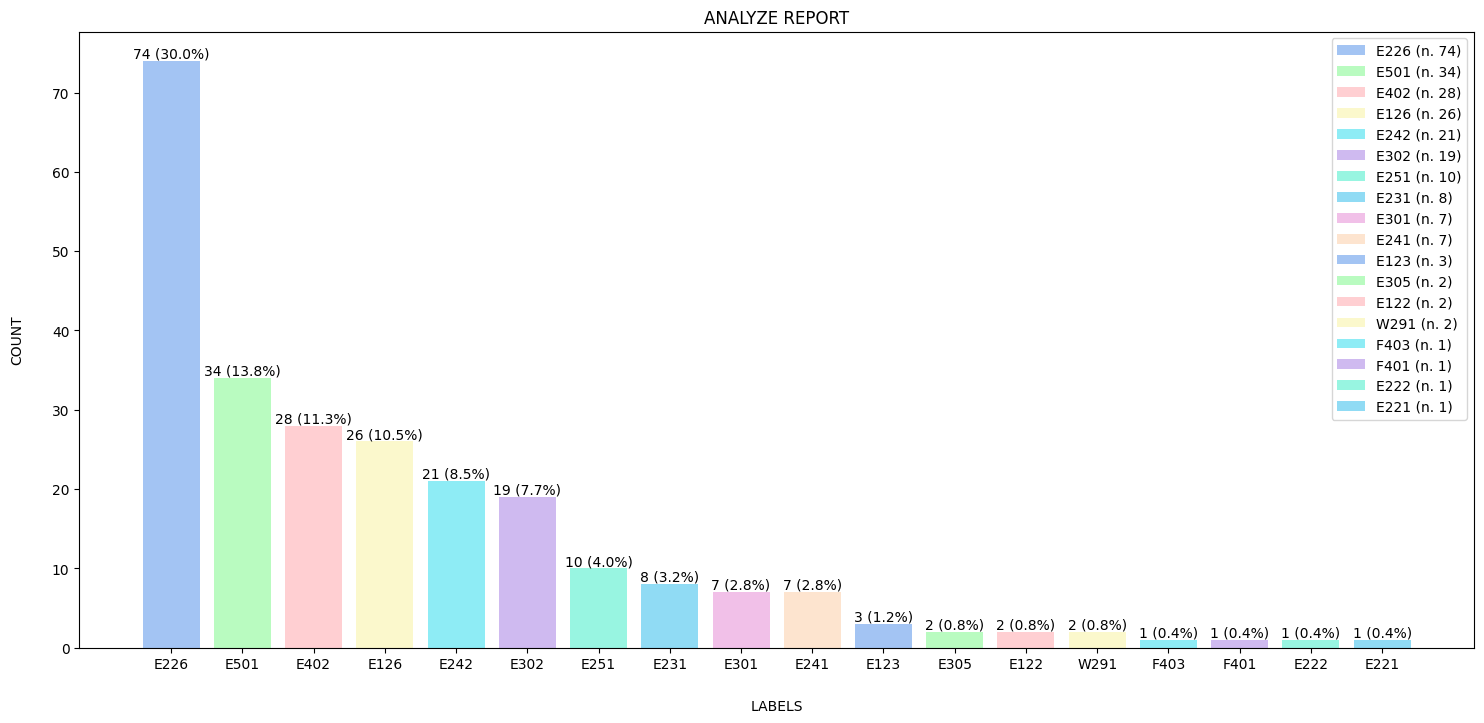

In [5]:
count1 = df1.code.value_counts()
bar_labels = [count1.index[i].capitalize()+' (n. ' + str(count1[i]) + ')' for i in range(len(count1.index))]
random.shuffle(my_pastel_palette)
bars = plt.bar(count1.index, height=count1, label=bar_labels, color=my_pastel_palette)
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df1)*100:.1f}%)', ha='center', va='bottom')
plt.xlabel('LABELS', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE REPORT')
plt.legend()
plt.show()

In [6]:
df_groupby = df1.drop_duplicates(subset='code', keep='first').sort_values(by=['code'])
print(''.join(['> ' for i in range(45)]))
print(f'\n{"CODE":<15}{"DESCRIPTION":<15}\n')
print(''.join(['> ' for i in range(45)]))
for i in df_groupby[['code', 'text']].values:
    print(f'{i[0]:<15}{i[1]:<15}')

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

CODE           DESCRIPTION    

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
E122           continuation line missing indentation or outdented
E123           closing bracket does not match indentation of opening bracket's line
E126           continuation line over-indented for hanging indent
E221           multiple spaces before operator
E222           multiple spaces after operator
E226           missing whitespace around arithmetic operator
E231           missing whitespace after ','
E241           multiple spaces after ':'
E242           tab after ':'  
E251           unexpected spaces around keyword / parameter equals
E301           expected 1 blank line, found 0
E302           expected 2 blank lines, found 1
E305           expected 2 blank lines after class or function definition, found 1
E402           module level import not at top of file
E50

In [50]:
# Code for checking the single issues to fix
# err = pd.read_json(after_report_parse)
# print(err.filename.value_counts())
# err.loc[(err['filename'] == 'src/models/model.py')]

# **Flake8** analysis **after** issues fixing

Command launched AFTER fixing issues

```flake8 --format=json-pretty --output-file=reports/linters/3.1.0-report-flake8-after.json --config=.flake8 src```

In [45]:
try:
    with open(after_report, 'r', encoding='utf-8') as f:
        if os.stat(after_report).st_size > 0:
            data = json.load(f)
            data_p = []
            for _, value in data.items():
                data_p += value
            json_string = json.dumps(data_p)
            with open(after_report_parse, 'w', encoding='utf-8') as f:
                f.write(json_string)
            df2 = pd.read_json(after_report_parse)
        else:
            df2 = pd.DataFrame()
            print('Empty file.')
except OSError as e:
    print(e)

Empty file.


In [46]:
# Execute only if df2 not empty
# df2.sample(5, random_state=3)

""


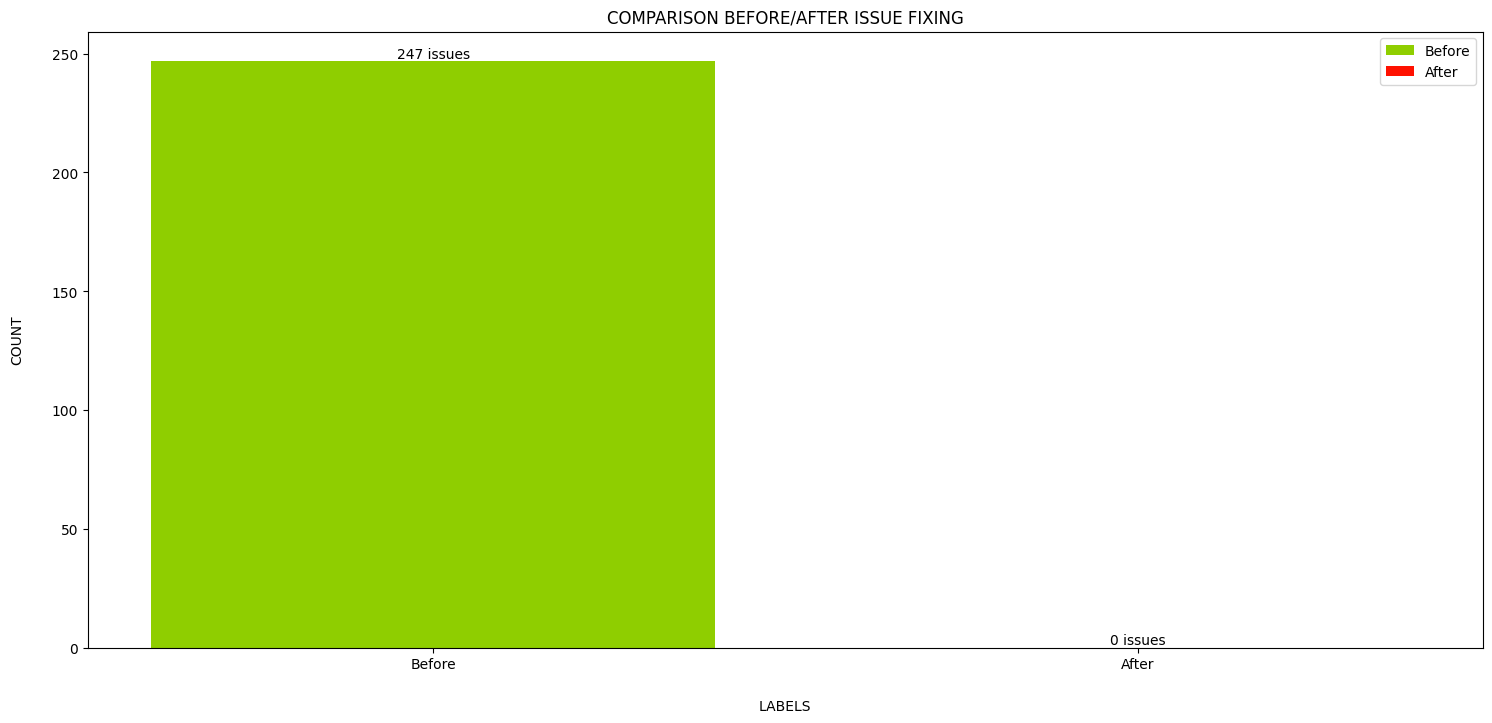

In [49]:
bars = plt.bar(['Before', 'After'], [len(df1), len(df2)], label=['Before', 'After'], color = ['#8fce00', '#ff1100'])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} issues', ha='center', va='bottom')
plt.xlabel('LABELS', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('COMPARISON BEFORE/AFTER ISSUE FIXING')
plt.legend()
plt.show()